# Python Regression & Analysis Tool
Written by Jacob Marshall

In [4]:
# import libraries
import numpy as np
from scipy.optimize import least_squares
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def analyze(model_name, parameter_guess, x_exp, y_exp, model_extension):
    """
    Args:
        model_name (function): function name of the model that will be regressed
        parameter_guess (numpy.ndarray): guess values for the parameters in the model
        x_exp (numpy.ndarray): x experimental data
        y_exp (numpy.ndarray): y experimental data
        model_extension (int/float): how far past the experimental data the model will predict
    """
    
    ### Regression of model ###
    def residual(p, model, x, y):
        # y_measured - y_predicted
        return y - model(p, x) 
    
    least_sq_fit = least_squares(residual, parameter_guess, args=(model_name, x_exp, y_exp))
    parameter_regress = least_sq_fit.x # least_sq.x are the parameters found with the regression
    Residual_error = least_sq_fit.fun # least_sq.fun are the residual errors found with the regression
    
    ### Analyze experimental data ###
    SSE = np.sum(Residual_error**2)
    n = len(x_exp)
    σ_hat = np.sqrt(SSE/(n - 2))
    x̄ = np.average(x_exp)
    t_student = t.ppf(0.95 + (1 - 0.95)/2, n - 2) #95% two tail student t

    ### R Squared ###    
    ȳ = np.average(y_exp)
    R_squared = 1 - SSE/np.sum((ȳ - model_name(parameter_regress, x_exp))**2)
    
    ### Model over a range ###
    x_model = np.linspace(np.min(x_exp) - model_extension ,np.max(x_exp) + model_extension, 100)   
    y_model = model_name(parameter_regress, x_model)
    
    ### Find confidence interval of the model ###
    S_ŷ = np.sqrt(1/n + (x_model - x̄)**2 / np.sum((x_exp - x̄)**2)) * σ_hat
    CI = S_ŷ * t_student
    UCI = y_model + CI
    LCI = y_model - CI
    
    ### Prediction Band ###
    PB = t_student * np.sqrt(1 + 1/n + (x_model - x̄)**2/np.sum((x_exp - x̄)**2)) * σ_hat
    UPB = y_model + PB
    LPB = y_model - PB
    
    ### Plot model with 95% Confidence Interval ###
    plt.plot(x_exp, y_exp,'ro', label='experimental data')
    plt.plot(x_model, y_model,'b-', label=model_name.__name__ + ' predicted model')
    plt.plot(x_model, UCI, 'g--', label='95% confidence interval')
    plt.plot(x_model, LCI, 'g--')
    plt.plot(x_model, UPB, 'r:', label='95% prediction band')
    plt.plot(x_model, LPB, 'r:')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc='best')
    plt.show()
    
    ### Plot Residual ###
    plt.plot(x_exp, Residual_error, 'rx')
    plt.plot([np.min(x_exp), np.max(x_exp)], [0, 0], 'k--')
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.show()
    print('Residuals should be randomly scatter around zero')

    ### Print R_squared Value and Regressed Parameter ###
    print('R_Squared: {}'.format(R_squared))
    print('Regressed Parameters: {}'.format(parameter_regress))

## Line Example

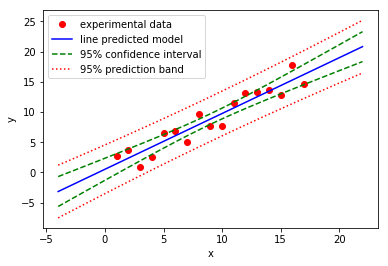

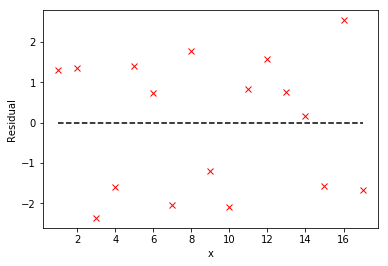

Residuals should be randomly scatter around zero
R_Squared: 0.87693184945762
Regressed Parameters: [ 0.51611765  0.92292157]


In [6]:
# line model
def line(p, x):
    return p[0] + p[1] * x

# line experimental data
x_exp_line = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
y_exp_line = np.array([2.749,3.720,0.926,2.623,6.540,6.780,4.946,9.674,7.620,
                       7.650,11.514,13.183,13.282,13.604,12.795,17.824,14.551])

# parameter guess values
p_guess_line = np.array([1, 1]) 

# model extension: How far past the experimental data the model predicts
extension_line = 5 

# perform analysis
analyze(line, p_guess_line, x_exp_line, y_exp_line, extension_line)

## Polynomial Example

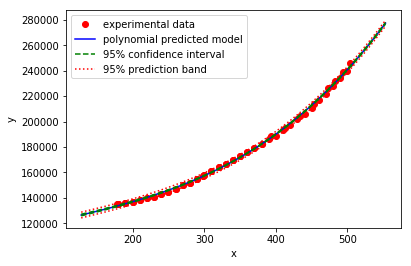

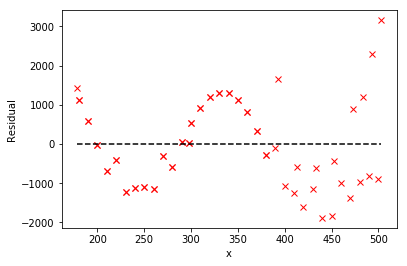

Residuals should be randomly scatter around zero
R_Squared: 0.9988599028225904
Regressed Parameters: [  1.08799131e+05   1.58793552e+02  -2.87897699e-01   9.97277492e-04]


In [7]:
# polynomial model

def polynomial(p, x):
    return p[0] + p[1] * x + p[2] * x**2 + p[3] * x**3

# polynomial experimental data
x_exp_polynomial = np.array([180,190,200,210,220,230,240,250,260,270,280,290,298.15,300,310,320,330,340,350,360,370,
                             380,390,400,410,420,430,440,450,460,470,480,490,500,393.15,413.15,433.15,453.15,473.15,
                             483.15,493.15,503.15,178.1,180,190,200,210,220,230,240,250,260,270,280,290,298.1,300,
                             310,320,330,340,350,360,370,380])
y_exp_polynomial = np.array([1.35E+05,1.36E+05,1.37E+05,1.38E+05,1.40E+05,1.41E+05,1.43E+05,1.45E+05,1.47E+05,1.50E+05,
                             1.52E+05,1.55E+05,1.57E+05,1.58E+05,1.61E+05,1.64E+05,1.67E+05,1.70E+05,1.73E+05,1.76E+05,
                             1.79E+05,1.82E+05,1.86E+05,1.89E+05,1.93E+05,1.97E+05,2.02E+05,2.06E+05,2.11E+05,2.17E+05,
                             2.22E+05,2.28E+05,2.34E+05,2.40E+05,1.89E+05,1.95E+05,2.04E+05,2.14E+05,2.26E+05,2.32E+05,
                             2.39E+05,2.46E+05,1.35E+05,1.35E+05,1.36E+05,1.37E+05,1.38E+05,1.40E+05,1.41E+05,1.43E+05,
                             1.45E+05,1.47E+05,1.50E+05,1.52E+05,1.55E+05,1.57E+05,1.58E+05,1.61E+05,1.64E+05,1.67E+05,
                             1.70E+05,1.73E+05,1.76E+05,1.79E+05,1.82E+05])

# parameter guess values
p_guess_polynomial = np.array([1.5e5, 2e2, 1, 1e-3])

# model extension: How far past the experimental data the model predicts
extension_polynomial = 50

# perform analysis
analyze(polynomial, p_guess_polynomial, x_exp_polynomial, y_exp_polynomial, extension_polynomial)

## Non-Linear Example

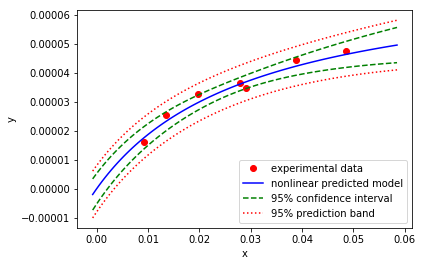

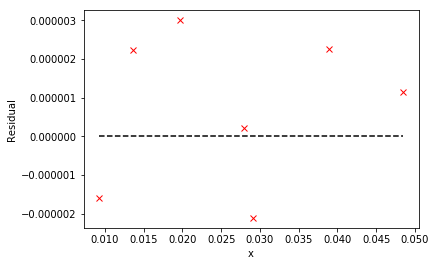

Residuals should be randomly scatter around zero
R_Squared: 0.9566032669934643
Regressed Parameters: [  0.97418465   0.0512878   33.23762848]


In [8]:
# non-linear model
def nonlinear(p, x):
    return p[0] * p[1] * 0.050 * x/(1 + p[1] * 0.050 + p[2] *x)

# non-linear experimental data
x_exp_nonlinear = np.array([0.00922, 0.0136, 0.0197, 0.0280, 0.0291, 0.0389, 0.0485])
y_exp_nonlinear = np.array([1.60, 2.56, 3.27, 3.64, 3.48, 4.46, 4.75]) * 10**-5

# parameter guess values
p_guess_nonlinear = np.array([1, 1, 35])

# model extension: How far past the experimental data the model predicts
extension_nonlinear = 0.01

# perform analysis
analyze(nonlinear, p_guess_nonlinear, x_exp_nonlinear, y_exp_nonlinear, extension_nonlinear)